In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 30

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from subprocess import check_output
plt.style.use('fivethirtyeight')


SyntaxError: unexpected EOF while parsing (<ipython-input-51-e370b18f467f>, line 15)

<h1>Pandas performance optimaliseren</h1>

In [35]:
# Csv file inlezen in een python dataframe
df = pd.read_csv('data/shot_logs.csv')
df2 = df.copy()

players = pd.read_csv('data/players_stats.csv')
players.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,...,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,16,24,66.7,6,26,...,14,15,110,3.29,0.50,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,145,174,83.3,32,134,...,157,189,791,1.66,0.34,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,44,61,72.1,46,123,...,38,83,318,0.87,0.55,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,30,46,65.2,48,114,...,44,88,244,0.68,0.43,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,107,141,75.9,131,413,...,100,121,1530,2.44,0.68,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


<h3>Gewone loops in pandas</h3>

In [3]:
# functie die gewoon doe alle rows afgaat en de waarde in een nieuwe lijst steekt
def manuele_loop(df):
    test_list = []
    for i in range(0, len(df)):
        d = df.iloc[i]['SHOT_CLOCK']
        test_list.append(d)
    return test_list

In [4]:
%%timeit
# Maneuele loop functie runnen en timen
df['testkolom'] = manuele_loop(df)


1 loop, best of 3: 21.1 s per loop


<h3>Loopen met iterrows()</h3>

In [5]:
%%timeit

# Gebruik van iterrows()
test_list = []
for index, row in df.iterrows():
    test_list.append(df['SHOT_CLOCK'])
df['testkolom'] = test_list


1 loop, best of 3: 6.59 s per loop


<h3>Loopen met de apply() methode</h3>

In [6]:
%timeit df['testkolom'] = df.apply(lambda row: df['SHOT_CLOCK'])


10 loops, best of 3: 91.9 ms per loop


<h3>Vectoriseren over pandas series (executie over een volledige array)</h3>

In [7]:
%timeit df['testkolom'] = df['SHOT_CLOCK']

The slowest run took 4.07 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 224 µs per loop


In [8]:
sales = [("TYPE VAN LOOP", ["Manuele loop", "iterrows loop", "apply loops", "Vectoriseren"]),
         ("UITVOERSNELHEID", ["25 800 ms", "7 270 ms", "90.8 ms", "0.302 ms"]),
         ("IMPROVEMENT", [" ", "x3,5", "x80","x300"])
         ]
df2 = pd.DataFrame.from_items(sales)
df2

,TYPE VAN LOOP,UITVOERSNELHEID,IMPROVEMENT
0,Manuele loop,25 800 ms,
1,iterrows loop,7 270 ms,"x3,5"
2,apply loops,90.8 ms,x80
3,Vectoriseren,0.302 ms,x300


<h1>De dataset opkuisen</h1>

In [9]:
# headers van df.columns
#'GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
#'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
#'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
#'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
#'player_name', 'player_id'
df = pd.read_csv('data/shot_logs.csv')
df.columns = map(str.upper, df.columns)
df.describe()


,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_ID
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


<h3>Null values in dataset</h3>

In [10]:
# Check welke kolommen null values bevatten
df.isnull().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
PLAYER_NAME                      0
PLAYER_ID                        0
dtype: int64

In [11]:
# Totaal aantal rijen waar SHOT_CLICK = NaN en hoeveel % vd dataset
shotclock_nan = len (df[df['SHOT_CLOCK'].isnull()])
print("totaal aantal rijen in SHOT_CLOCK met NaN: " + str(shotclock_nan))
print ("Aaantal % van de SHOT_CLOCK kolom NaN: " + str(round(float(len (df[df.SHOT_CLOCK.isnull()==True]))/float(len (df)),2)*100),'%')

totaal aantal rijen in SHOT_CLOCK met NaN: 5567
Aaantal % van de SHOT_CLOCK kolom NaN: 4.0 %


In [12]:
# Theorie shotclock = NaN?
# In basketbal wanneer game clock < 24 seconden, wordt de shotclock afgezet, dit zou dus kunnen leiden tot deze values.
# Om na te gaan of dit werkelijk de oorzaak is gaan we 3 tests doen:
#      1. Kijken of er degelijk NaN waarden zijn als game clock < 24 seconden
#      2. Kijken of er nog altijd NaN waarden zijn als game clock > 24 seconden
#      3. Kijken of er instanties bestaan waarbij de shotclock valid time heeft en game clock < 24

nan_under_24 = len(df[(df['GAME_CLOCK'] <= '0:24') & (df['SHOT_CLOCK'].isnull())])
nan_over_24 = len(df[(df['GAME_CLOCK'] > '0:24') & (df['SHOT_CLOCK'].isnull())])
valid_under_24 = len(df[(df['GAME_CLOCK'] <= '0:24') & (~df['SHOT_CLOCK'].isnull())])

print("Aantal NaN als game clock <= 24 seconden: " + str(nan_under_24))
print("Aantal NaN als game clock > 24 seconden: " + str(nan_over_24))
print("Aantal instanties waar shotclock  is valid time en game clock < 24: " + str(valid_under_24))

# Conclusie: Er is geen logische verklaring voor shotclock = NaN.
# Aangezien bij game clock < 24, de shot clock zowel NaN kan zijn, als een valid time.

Aantal NaN als game clock <= 24 seconden: 3554
Aantal NaN als game clock > 24 seconden: 2013
Aantal instanties waar shotclock  is valid time en game clock < 24: 2118


In [13]:
# Rows verwijderen waar shot clock = NaN
# nan=float('nan')
# df=df[~np.isnan(df['SHOT_CLOCK'])]

<h3>Fouten & aanpassingen in dataset</h3>

In [14]:
# PTS_TYPE = 3 en SHOT_DIST < 22, 22 feet is de kortste afstand in nba voor een 3 punter, toch zijn er instanties waar
# een speler 3 punten scoort en toch SHOT_DIST < 22 heeft.
aantal_foute_3punters = len(df[(df['SHOT_DIST'] < 22) & (df['PTS_TYPE'] == 3)])
print("Aantal rows waarin een 3 punter een te korte afstand heeft: " + str(aantal_foute_3punters))

Aantal rows waarin een 3 punter een te korte afstand heeft: 872


In [15]:
# https://youtu.be/InDis_QY2X4?t=186 Link naar de game waarbij klay de 3 punter shot
df[(df['GAME_ID'] == 21400382) & (df['SHOT_DIST'] < 22) & (df['PTS_TYPE'] == 3)]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID
15593,21400382,"DEC 18, 2014 - GSW vs. OKC",H,W,5,6,2,3:28,21.4,0,1.2,20.9,3,made,"Jones, Perry",203103,5.4,1,3,klay thompson,202691


In [16]:
# Overal waar shot distance < 22 feet maar toch een 3 punter is, gaan we shot_dist op 9999 zetten
df.loc[(df['SHOT_DIST'] < 22) & (df['PTS_TYPE'] == 3), 'SHOT_DIST'] = 9999

In [17]:
# Touch time is in sommige gevallen negatief
touch_neg = len (df[df['TOUCH_TIME']<0])
print ("Aantal negatieve touch value: " + str(touch_neg))
print ("Aantal procent negatieve touch value: " + str(round(len (df[df['TOUCH_TIME']<0])/float(len (df)),3)*100),'%')

Aantal negatieve touch value: 312
Aantal procent negatieve touch value: 0.2 %


In [18]:
# Enkel de rows overhouden waar touchtime > 0
# df=df[df['TOUCH_TIME']>0]

In [19]:
# MATCHUP kolom bevat veel data dat eigenlijk kan opgesplitst worden (datum / thuisteam / uitteam)

# splits datum voor datum kolom
def datum_split(x):
    
    (a,b)=x.split('-')
    a=a.strip()
    
    return a

# splits thuis team adhv @ of vs voor thuis team kolom
def thuis_team_split(x):
    (a,b) = x.split('-')
    if '@' in b:
        (b1, b2) = b.split('@')
    if 'vs.' in b:
        (b2, b1) = b.split('vs.')

    b2 = b2.strip()

    return(b2)

# splits uit team adhv @ of vs voor uit team kolom
def uit_team_split(x):
    (a,b) = x.split('-')
    if '@' in b:
        (b2, b1) = b.split('@')
    if 'vs.' in b:
        (b1, b2) = b.split('vs.')

    b2 = b2.strip()

    return(b2)
           
# defenieer winning team adhv @ of vs en de W kolom voor de winning team kolom
def winning_team(x):
    (a,b) = x['MATCHUP'].split('-')
    if '@' in b:
        (b1, b2) = b.split('@')
        if  x['W'] == 'L':
            winning_team = b2.strip()
        else:
            winning_team = b1.strip()
            
    if 'vs.' in b:
        (b2, b1) = b.split('vs.')
        if x['W'] == 'L':
            winning_team = b1.strip()
        else:
            winning_team = b2.strip()
    return winning_team

In [20]:
df['DATUM']=df['MATCHUP'].apply(datum_split)
df['DATUM']=df['DATUM'].apply(pd.to_datetime)
df['THUIS_TEAM']=df['MATCHUP'].apply(thuis_team_split)
df['UIT_TEAM']=df['MATCHUP'].apply(uit_team_split)
# axis = 1 MOET ERBIJ!!!! specifieert dat het over rijen moet gaan en niet over kolommen
df['WIN_TEAM']=df.apply(winning_team, axis=1)
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID,DATUM,THUIS_TEAM,UIT_TEAM,WIN_TEAM
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,2015-03-04,BKN,CHA,CHA
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,2015-03-04,BKN,CHA,CHA
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,2015-03-04,BKN,CHA,CHA
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,2015-03-04,BKN,CHA,CHA
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,2015-03-04,BKN,CHA,CHA


<h1>Analyse vd dataset adhv graphs</h1>

<h3>Thuis / Uit voordeel voor ploegen en shotpercentage</h3>

In [21]:
# HOME/AWAY INVLOED OP SHOT ??
# BEST/WORST CLUTCH TEAMS/SHOOTERS?
# SPOT UP SHOOTER VS NON SPOT UP SHOOTER

# Array van alle spelers (uniek)
all_players = sorted((df['PLAYER_NAME'].unique()))

# Functie die een playernaam ontvangt en hiervoor de percentage gemiste/gemaakte worpen in thuis/uit wedstrijden teruggeeft
def home_away_specific_player(playername):
    df3 = df[(df['PLAYER_NAME'] == str(playername))]
    obj = df3.groupby(['LOCATION', 'SHOT_RESULT']).size()
    
    dict = {
            'made_away': obj[0],
            'missed_away': obj[1],
            'made_home': obj[2],
            'missed_home': obj[3]
           }

    return dict

In [22]:
# Maakt automatisch percentage van de value doorgegeven (nodig om value EN percent te tonen in pie chart)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Functie die de pie charts opstelt, roept ook de home_away_specific player functie aan om deze door te geven aan de pie chart
def make_pie_shots(playername):
    dict = home_away_specific_player(playername)
    labels = 'Gescoord', 'Gemist'
    values_home = [dict['made_home'],dict['missed_home']]
    values_away = [dict['made_away'], dict['missed_away']]
    
    # Om de pie charts naast een te krijgen + op figure t zetten
    fig1, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    # De 2 pies
    ax1.pie(values_home, labels=labels, autopct=make_autopct(values_home), shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax2.pie(values_away, labels=labels, autopct=make_autopct(values_away), shadow=True, startangle=90)
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Titels van pies
    ax1.set_title('shot % \n THUIS')
    ax2.set_title('shot % \n UIT')
    
    # Pies niet laten overlappen (waarden zo laten staan, anders veel geknoei)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0, right=1.3, hspace=0.5,
                    wspace=15)
    
    # Pies groter maken
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    
    # Show de plots
    plt.show()
    
    

In [23]:
interact(make_pie_shots,playername = all_players)

<function __main__.make_pie_shots>

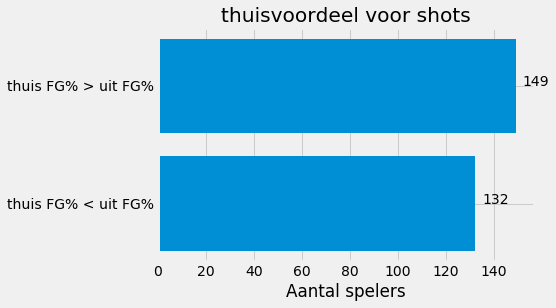

In [24]:
# Counter voor spelers te tellen die beter shotten thuis/uit of gelijk
counter_home = 0
counter_away = 0
counter_even = 0

# Counter op laten tellen in for loop
for player in all_players:
    dict = home_away_specific_player(player)
    total_home = sum([dict['made_home'],dict['missed_home']])
    total_away = sum([dict['made_away'], dict['missed_away']])
    perc_made_home = int((round(dict['made_home']*total_home)*100.0))
    perc_made_away = int((round(dict['made_away']*total_away)*100.0))
    
    if perc_made_home > perc_made_away:
        counter_home += 1
    elif perc_made_home < perc_made_away:
        counter_away += 1

# Horizontale barchart opmaken        
fig, ax = plt.subplots()
labels = 'thuis FG% > uit FG%', 'thuis FG% < uit FG%'
y_pos = np.arange(len(labels))
performance = [counter_home, counter_away]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis() 
ax.set_xlabel('Aantal spelers')
ax.set_title('thuisvoordeel voor shots')
# values naast bar (v+3 is afstand tot bar, i = hoogte)
for i, v in enumerate(performance):
    ax.text(v + 3, i, str(v), color='black')

plt.show()

In [25]:
# BIG PITFALL IN DE DATASET --> elke match staat er eigenlijk 2x in:
#                              1. 1x als Uit_ploeg: @ thuis_ploeg
#                              2. 1x als thuis_ploeg vs uit_ploeg 
# Dit is gewoon 1 match, maar staat er dubbel in om aan te geven bij welk team speler eigenlijk hoort.

# Elke matchup er maar 1x in laten voorkomen


# Array van alle teams
all_teams = sorted((df['THUIS_TEAM'].unique()))

def home_away_specific_team(team):
    # THUIS
    df4 = df.drop_duplicates(['MATCHUP'])
    df4 = df4[(df4['THUIS_TEAM'] == str(team))]
    df4 = df4.drop_duplicates(subset=['DATUM', 'THUIS_TEAM', 'UIT_TEAM'])
    home_wins = len(df4[(df4['THUIS_TEAM'] == team) & (df4['WIN_TEAM'] == team)])  
    home_losses = len(df4[(df4['THUIS_TEAM'] == team) & (df4['WIN_TEAM'] != team)]) 
    
    # UIT
    df5 = df.drop_duplicates(['MATCHUP'])
    df5 = df5[(df5['UIT_TEAM'] == str(team))]
    df5 = df5.drop_duplicates(subset=['DATUM', 'THUIS_TEAM', 'UIT_TEAM'])  
    away_wins = len(df5[(df5['UIT_TEAM'] == team) & (df5['WIN_TEAM'] == team)]) 
    away_losses = len(df5[(df5['UIT_TEAM'] == team) & (df5['WIN_TEAM'] != team)]) 
    dict = {
            'home_losses':  home_losses,
            'home_wins': home_wins,
            'away_losses': away_losses,
            'away_wins': away_wins
           }

    return dict


In [26]:
# Maakt automatisch percentage van de value doorgegeven (nodig om value EN percent te tonen in pie chart)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Functie die de pie charts opstelt, roept ook de home_away_specific player functie aan om deze door te geven aan de pie chart
def make_pie_teams(team):
    dict = home_away_specific_team(team)
    labels = 'Winst', 'Verlies'
    values_home = [dict['home_wins'],dict['home_losses']]
    values_away = [dict['away_wins'],dict['away_losses']]
    
    # Om de pie charts naast een te krijgen + op figure t zetten
    fig1, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    # De 2 pies
    ax1.pie(values_home, labels=labels, autopct=make_autopct(values_home), shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax2.pie(values_away, labels=labels, autopct=make_autopct(values_away), shadow=True, startangle=90)
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Titels van pies
    ax1.set_title('Winst/verlies %\n THUIS')
    ax2.set_title('Winst/verlies %\n UIT')
    
    # Pies niet laten overlappen (waarden zo laten staan, anders veel geknoei)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0, right=1.3, hspace=0.5,
                    wspace=15)
    
    # Pies groter maken
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    
    # Show de plots
    plt.show()
    

In [27]:
interact(make_pie_teams,team = all_teams)

<function __main__.make_pie_teams>

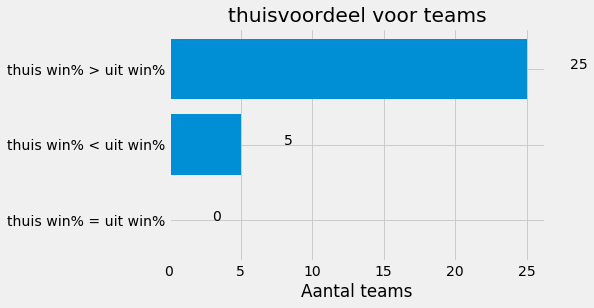

In [28]:
# THUIS UIT WIN LOS
# https://matplotlib.org/examples/pylab_examples/bar_stacked.html
# https://matplotlib.org/examples/api/barchart_demo.html

# Counter voor teams te tellen die meer/minder/gelijk thuis winnen
counter_home = 0
counter_away = 0
counter_even = 0

# Counter op laten tellen in for loop
for team in all_teams:
    dict = home_away_specific_team(team)
    total_home = sum([dict['home_losses'], dict['home_wins']])
    total_away = sum([dict['away_losses'], dict['away_wins']])
    perc_win_home = int((round(dict['home_wins']*total_home)*100.0))
    perc_win_away = int((round(dict['away_wins']*total_away)*100.0))
    
    if perc_win_home > perc_win_away:
        counter_home += 1
    elif perc_win_home < perc_win_away:
        counter_away += 1
    else: 
        counter_even += 1

# Horizontale barchart opmaken        
fig, ax = plt.subplots()
labels = 'thuis win% > uit win%', 'thuis win% < uit win%', 'thuis win% = uit win%'
y_pos = np.arange(len(labels))
performance = [counter_home, counter_away, counter_even]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis() 
ax.set_xlabel('Aantal teams')
ax.set_title('thuisvoordeel voor teams')
# values naast bar (v+3 is afstand tot bar, i = hoogte)
for i, v in enumerate(performance):
    ax.text(v + 3, i, str(v), color='black')

plt.show()


<h1> Fear factor ratio </h1>

In [36]:
players['Name'] = players.Name.apply(lambda x: x.strip(',.').lower())
df['Defender_Name'] = df.CLOSEST_DEFENDER.apply(lambda x: x.split(',')[0])

In [37]:
 def surname(full_name):
    split = full_name.split(' ')
    if len(split) == 2:
        return split[1]
    else:
        return ' '
   
players['Name'] = players.Name.apply(lambda x: x.strip(',.').lower())
players['Surname'] = players.Name.apply(lambda x: surname(x))
df['Defender_Name'] = df.CLOSEST_DEFENDER.apply(lambda x: x.split(',')[0].strip(',.').lower())

df['Player_Height'] = df.player_name.apply(lambda x: players.Height[players.Name == x].values[0] if len(players.Height[players.Name == x].values)>0 else 0) 
df['Defender_Height'] = df.Defender_Name.apply(lambda x: players.Height[players.Surname == x].values[0] if len(players.Height[players.Surname == x].values)>0 else 0) 
df['Height_Diff'] = df.Player_Height - df.Defender_Height

In [38]:
df = df[np.abs(df.Height_Diff) < 50]
df = df[df.Defender_Height>0]
df = df[df.Player_Height > 0]

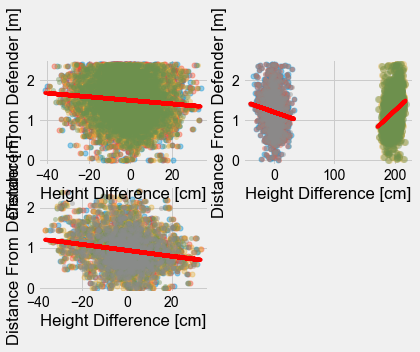

In [52]:
plt.subplot(2,2,3)
lim = 10
dist_data = df[df.SHOT_DIST<lim+0.5]
dist_data = dist_data[dist_data.SHOT_DIST>lim-0.5]
dist_data = dist_data[dist_data.CLOSE_DEF_DIST<8]

x = dist_data.Height_Diff + np.random.normal(0,1.25,len(dist_data))
y = dist_data.CLOSE_DEF_DIST*0.3048
plt.plot(x,y,'o',alpha = 0.4, markersize = 5)
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, fit_fn(x),'r')
plt.xlabel('Height Difference [cm]')
plt.ylabel('Distance From Defender [m]')


plt.subplot(2,2,1)
lim = 23
dist_data = df[df.SHOT_DIST<lim+1]
dist_data = dist_data[dist_data.SHOT_DIST>lim-1]
dist_data = dist_data[dist_data.CLOSE_DEF_DIST<8]

x = dist_data.Height_Diff + np.random.normal(0,1.25,len(dist_data))
y = dist_data.CLOSE_DEF_DIST*0.3048
plt.plot(x,y,'o',alpha = 0.4, markersize = 5)
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, fit_fn(x),'r')
plt.xlabel('Height Difference [cm]')
plt.ylabel('Distance From Defender [m]')


plt.subplot(2,2,2)
lim = 15
dist_data = df[df.SHOT_DIST<lim+0.5]
dist_data = dist_data[dist_data.SHOT_DIST>lim-0.5]
dist_data = dist_data[dist_data.CLOSE_DEF_DIST<8]

x = dist_data.Height_Diff + np.random.normal(0,1.25,len(dist_data))
y = dist_data.CLOSE_DEF_DIST*0.3048
plt.plot(x,y,'o',alpha = 0.4, markersize = 5)
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, fit_fn(x),'r')
plt.xlabel('Height Difference [cm]')
plt.ylabel('Distance From Defender [m]')
plt.show()

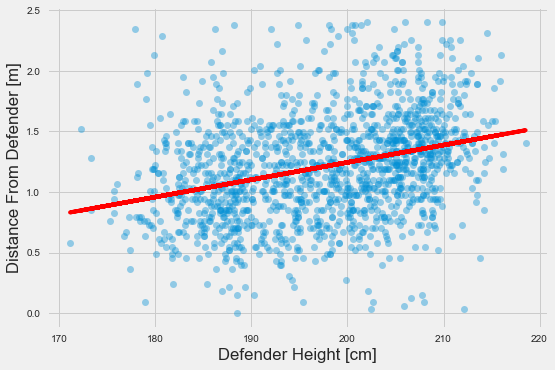

In [53]:
x = dist_data.Defender_Height + np.random.normal(0,1.25,len(dist_data))
y = dist_data.CLOSE_DEF_DIST*0.3048
plt.plot(x,y,'o',alpha = 0.4)
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, fit_fn(x),'r')
plt.xlabel('Defender Height [cm]')
plt.ylabel('Distance From Defender [m]')
plt.show()